## Recurrent Neural Networks Deep Learning GRU

## Installs:

In [ ]:
# % pip install torch

## Imports:

In [ ]:
# Pytorch
import torch # Pytorch
import torch.nn as nn # Pytorch Neural Network
import torch.nn.functional as F # Pytorch Functional
import torch.optim as optim # Optimizer

# Numpy
import numpy as np # Numpy

# Matplotlib
import matplotlib.pyplot as plt # Matplotlib

# Unicodedata
import unicodedata # Unicodedata

# String
import string # String

# Read data
import os as os # Os

## Classifying names with a Character-Level RNN

Problem: Given an input proper name, classify that name according to the nationality to which it belongs. Entrance: Hinton

(-0.47) Scottish

(-1.52) English

(-3.57) Irish

-

Entry: Schmidhuber

(-0.19) German

(-2.48) Czech

(-2.68) Dutch

## Loading Dataset

In [ ]:
# Download Data
#! wget https://download.pytorch.org/tutorial/data.zip
#! unzip data.zip
#! ls

--2024-05-07 10:10:18--  https://download.pytorch.org/tutorial/data.zip
Resolving download.pytorch.org (download.pytorch.org)... 108.138.64.125, 108.138.64.61, 108.138.64.97, ...
Connecting to download.pytorch.org (download.pytorch.org)|108.138.64.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2882130 (2.7M) [application/zip]
Saving to: ‘data.zip.1’

data.zip.1          100%[===================>]   2.75M  --.-KB/s    in 0.03s   

2024-05-07 10:10:18 (94.5 MB/s) - ‘data.zip.1’ saved [2882130/2882130]

Archive:  data.zip
replace data/eng-fra.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/eng-fra.txt        
  inflating: data/names/Arabic.txt   
  inflating: data/names/Chinese.txt  
  inflating: data/names/Czech.txt    
  inflating: data/names/Dutch.txt    
  inflating: data/names/English.txt  
  inflating: data/names/French.txt   
  inflating: data/names/German.txt   
  inflating: data/names/Greek.txt    
  inflating: data/names/Irish.txt   

In [ ]:
# Function to read the file and create labels
def read_files(file_name):

    # Spliting files in lines
    lines = open(file_name).read().strip().split('\n')

    # Normalizing data
    names = [unicodedata.normalize('NFKD', line).encode('ascii', 'ignore') for line in lines]

    # Spliting Categories
    category = file_name.split('/')[-1].split('.')[0]

    # Labels
    labels = np.repeat(category, len(names))

    # Returning
    return names, labels

In [ ]:
# Defining root
root_path = 'data/names'
files = sorted(os.listdir(root_path))
categories = [c[: -4] for c in files]

In [ ]:
# Size files and categories
len(files), len(categories)

(18, 18)

In [ ]:
# Categories
categories

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [ ]:
# Files
files

['Arabic.txt',
 'Chinese.txt',
 'Czech.txt',
 'Dutch.txt',
 'English.txt',
 'French.txt',
 'German.txt',
 'Greek.txt',
 'Irish.txt',
 'Italian.txt',
 'Japanese.txt',
 'Korean.txt',
 'Polish.txt',
 'Portuguese.txt',
 'Russian.txt',
 'Scottish.txt',
 'Spanish.txt',
 'Vietnamese.txt']

In [ ]:
# Samples by class
dataset, labels = [], []
sample_by_class = []

for filename in files:

    # Return data
    returning_data = read_files(os.path.join(root_path, filename))

    # Salving data in list
    dataset.append(returning_data[0])

    # Salving label in list
    labels.append(returning_data[1])

    # Sample by class
    sample_by_class.append( (filename, len(returning_data[0])) )

In [ ]:
# Samples by class
for sample_class in sample_by_class:
    print(sample_class)

('Arabic.txt', 2000)
('Chinese.txt', 268)
('Czech.txt', 519)
('Dutch.txt', 297)
('English.txt', 3668)
('French.txt', 277)
('German.txt', 724)
('Greek.txt', 203)
('Irish.txt', 232)
('Italian.txt', 709)
('Japanese.txt', 991)
('Korean.txt', 94)
('Polish.txt', 139)
('Portuguese.txt', 74)
('Russian.txt', 9408)
('Scottish.txt', 100)
('Spanish.txt', 298)
('Vietnamese.txt', 73)


In [ ]:
# Min sample by class
print(f'Min sample: {min(sample_by_class, key = lambda k: k[1])}')

Min sample: ('Vietnamese.txt', 73)


In [ ]:
# View data
print(dataset[categories.index('Portuguese')][0:10])
print(labels[categories.index('Portuguese')][0:10])

[b'Abreu', b'Albuquerque', b'Almeida', b'Alves', b'Araujo', b'Araullo', b'Barros', b'Basurto', b'Belo', b'Cabral']
['Portuguese' 'Portuguese' 'Portuguese' 'Portuguese' 'Portuguese'
 'Portuguese' 'Portuguese' 'Portuguese' 'Portuguese' 'Portuguese']


## Converting the labels to tensor

### One-Hot representation of 18 language categories that we want to predict.

In [ ]:
def LabelToTensor(labels):

    # Defining a tensor with values in euros with the size of the labels
    label_tensor = torch.zeros(len(labels), 1, dtype = torch.int64)

    for k, label in enumerate(labels):
        idx = categories.index(label)
        label_tensor[k][0] = idx

    return label_tensor

In [ ]:
labels_test = labels[0]
tns_labels = LabelToTensor(labels_test)
print(type(tns_labels)), labels_test[0], tns_labels[0]

<class 'torch.Tensor'>


(None, 'Arabic', tensor([0]))

## Converting names to tensor

In [ ]:
valid_characters = string.ascii_letters
valid_characters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [ ]:
size_dictionary = len(valid_characters)
size_dictionary

52

In [ ]:
def NamesToTensor(data_names):

    # Defining a tensor with values in euros with the size of the Names
    names_tensor = torch.zeros(len(data_names), size_dictionary)

    for k, letter in enumerate(data_names.decode('utf-8')):
        idx = valid_characters.find(letter)

        names_tensor[k, idx] = 1
    return names_tensor

In [ ]:
name_test = dataset[0]
tsn_names = [NamesToTensor(name) for name in name_test]
print(name_test[0].decode('utf-8')[0], ' \n', tsn_names[0][0])

K  
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


## Sampling balanced batch

In [ ]:
# Defining the minimum number of samples according to the smallest dataset
num_sample = min(sample_by_class, key = lambda k: k[1])[1]
num_sample

73

In [ ]:
def sample_batch(size = num_sample):

    # Defining lists to store batch data
    data_batch, label_batch = [], []

    for cat in categories:
        sample_cat = dataset[categories.index(cat)]
        idx  = np.random.choice( range(len(sample_cat)), size = size )

        # Batch's
        data_batch.extend( [data for k, data in enumerate(dataset[categories.index(cat)]) if k in idx] )
        label_batch.extend( [label for k, label in enumerate(labels[categories.index(cat)]) if k in idx] )

    # Tranforming to Tensor's
    data = [NamesToTensor(batch)for batch in data_batch]
    label  =  LabelToTensor(label_batch)

    # Returning
    return data, label

In [ ]:
# Test function
data_batch, label_batch = sample_batch()

In [ ]:
# Vizualizing out
print(data_batch[500])
print(label_batch[500])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

## Recurrent Model

### Parameters and Hyperparameters

In [ ]:
args = {
    'device':'cuda' if torch.cuda.is_available() else 'cpu',
    'lr': 5e-5,
    'weight_decay': 1e-7,
    'num_epochs': 500
}
print(args)

{'device': 'cpu', 'lr': 5e-05, 'weight_decay': 1e-07, 'num_epochs': 500}


In [ ]:
## Recurrent NetWork

class RNN(nn.Module):

    def __init__(self, input_size, feature_size, out_size):

        # inicializing __init__()
        super(RNN, self).__init__()

        # Defining size parameters network
        self.input_size = input_size
        self.feature_size = feature_size
        self.out_size = out_size

        # Defining Layers
        self.features = nn.GRU(self.input_size, self.feature_size, batch_first = True)
        self.classifier = nn.Linear(self.feature_size, self.out_size)
        self.softmax = nn.LogSoftmax(dim = -1)


    def forward(self, X):

        # Initialize the internal state of the RNN
        batch_size = 1
        features = torch.zeros(1, batch_size, self.feature_size).to(args['device'])

        # Name.unsqueeze(0) - creating an artificial dimension for the batch = 1
        X, features = self.features(X.unsqueeze(0), features)

        X = self.classifier(X[:, -1])

        X = self.softmax(X)
        return X


In [ ]:
feature_size = 256

net = RNN(size_dictionary, feature_size, len(categories))
net.to(args['device'])

In [ ]:
net

RNN(
  (features): GRU(52, 256, batch_first=True)
  (classifier): Linear(in_features=256, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=-1)
)

## Loss

In [ ]:
criterion = nn.NLLLoss().to(args['device'])

## Optimizer

In [ ]:
optimizer = optim.Adam(net.parameters(), lr = args['lr'], weight_decay = args['weight_decay'])

## Training Flow

In [ ]:
# Function training and validation
def forward(X, y, epoch, train = True):

    # Defining
    if train == True:
        net.train()
        mode = 'Training'
    else:
        net.eval()
        mode = 'Validation'

    # Accuracy and Loss epochs
    accuracy = 0.
    epochs_loss = []

    for i, (data, label) in enumerate(zip(X, y)):

        # Cast in device
        data = data.to(args['device'])
        label = label.to(args['device'])

        # Prediction
        y_pred = net(data)

        # Loss calculate
        loss = criterion(y_pred, label)

        # List of Loss
        epochs_loss.append(loss.detach().cpu().numpy())

        # Exit from probabilities
        _, pred = torch.max(y_pred, axis = -1)

        # Calculate accuracy
        accuracy += 1 if pred[0].item() == label[0].item() else 0

        # Optimization

        if train == True:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Metrics from numpy
    epochs_loss = np.asarray(epochs_loss).ravel()
    accuracy = accuracy / float(len(epochs_loss))

    # Inplace
    print('\n', '*' * 15, mode, '*' * 15)
    print(f'Epoch: {epoch} Loss: {epochs_loss.mean():.2f} +/- {epochs_loss.std():.2f} -- Acc {accuracy:.2f}')

    # Returning
    return epochs_loss.mean(), accuracy

## Training

In [ ]:
train_loss, validation_loss = [], []
train_accuracy, validation_accuracy = [], []

In [ ]:
for epoch in range(args['num_epochs']):

    # Training Batch
    train_data, train_label = sample_batch()

    # Validation Batch
    validation_data, validation_label = sample_batch(size = 5)

    # Training
    loss, acc = forward(train_data, train_label, epoch = epoch, train = True)
    train_loss.append(loss)
    train_accuracy.append(acc)

    # Validation
    loss, acc = forward(validation_data, validation_label, epoch = epoch, train = False)
    validation_loss.append(loss)
    validation_accuracy.append(acc)


 *************** Training ***************
Epoch: 0 Loss: 2.84 +/- 0.44 -- Acc 0.09

 *************** Validation ***************
Epoch: 0 Loss: 2.98 +/- 0.69 -- Acc 0.06

 *************** Training ***************
Epoch: 1 Loss: 2.83 +/- 0.38 -- Acc 0.10

 *************** Validation ***************
Epoch: 1 Loss: 2.89 +/- 0.84 -- Acc 0.11

 *************** Training ***************
Epoch: 2 Loss: 2.86 +/- 0.28 -- Acc 0.12

 *************** Validation ***************
Epoch: 2 Loss: 2.89 +/- 0.61 -- Acc 0.11

 *************** Training ***************
Epoch: 3 Loss: 2.82 +/- 0.25 -- Acc 0.11

 *************** Validation ***************
Epoch: 3 Loss: 2.87 +/- 0.55 -- Acc 0.11

 *************** Training ***************
Epoch: 4 Loss: 2.81 +/- 0.26 -- Acc 0.12

 *************** Validation ***************
Epoch: 4 Loss: 2.78 +/- 0.26 -- Acc 0.12

 *************** Training ***************
Epoch: 5 Loss: 2.75 +/- 0.35 -- Acc 0.12

 *************** Validation ***************
Epoch: 5 Loss: 2.77 +

## Convergence Analysis

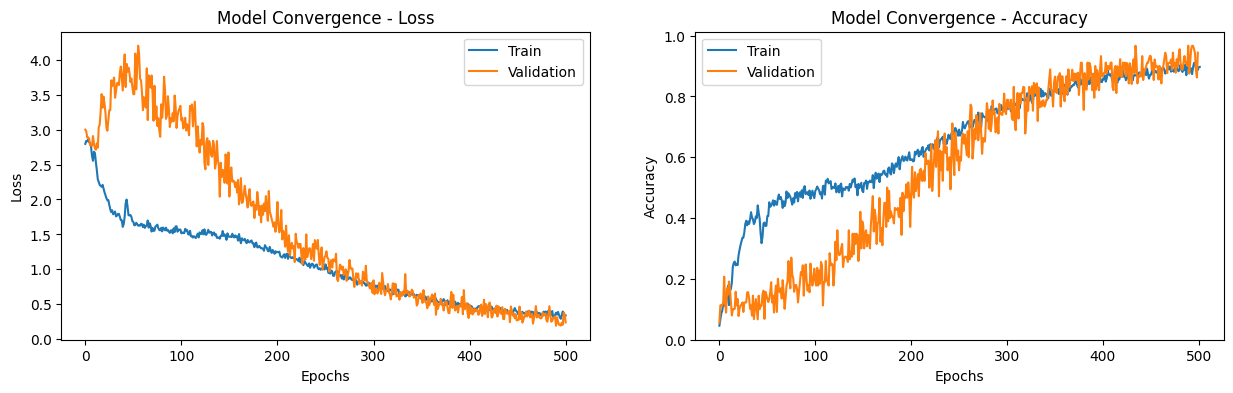

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 4))

ax1.plot(train_loss[1:], label = 'Train')
ax1.plot(validation_loss[1:], label = 'Validation')
ax1.set_title('Model Convergence - Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(train_accuracy, label = 'Train')
ax2.plot(validation_accuracy, label = 'Validation')
ax2.set_title('Model Convergence - Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

## Using the template

In [ ]:
def predict(name):
  net.eval()

  tns = torch.zeros( len(name), size_dictionary )
  for k, letter in enumerate(name):
    idx = valid_characters.find(letter)
    tns[k, idx] = 1
  tns = tns.to(args['device'])

  out = net(tns)
  topv, topi = out.data.topk(3, 1, True)

  print(name)
  for value, index in zip(topv[0], topi[0]):
    print('(%.2f) %s' % (value, categories[index]))
  print('\n')

predict('Merkel')
predict('Hirobumi')
predict('Suarez')

Merkel
(-1.02) German
(-1.26) English
(-1.58) Dutch


Hirobumi
(-0.03) Japanese
(-3.75) Russian
(-6.92) German


Suarez
(-0.04) Spanish
(-4.30) Polish
(-4.61) Dutch


